In [180]:
import xarray as x
data_accf = x.open_dataset("/Users/annika/Desktop/Project/Full_Data/DT00/f100___________20171202_0000_accf_gp.nc", engine='netcdf4')
data_accf

<xarray.Dataset>
Dimensions:         (time: 30, lon: 128, lev: 31, lat: 64, tbnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon             (lon) float32 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lev             (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0
  * lat             (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: tbnds
Data variables:
    YYYYMMDD        (time) float64 ...
    dt              (time) float64 ...
    nstep           (time) float64 ...
    hyam            (lev) float32 ...
    hybm            (lev) float32 ...
    atr20_o3        (time, lev, lat, lon) float32 ...
    atr20_ch4       (time, lev, lat, lon) float32 ...
    atr20_h2o       (time, lev, lat, lon) float32 ...
    atr20_contrail  (time, lev, lat, lon) float32 ...
    atr20_co2       (time, lev, lat, lon) float32 ...
    aps             (time, lat, lon) float32 ...
    time_bnds       (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             accf_gp
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_accf_gp.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [181]:
data_ECHAM = x.open_dataset("/Users/annika/Desktop/Project/Full_Data/DT00/f100___________20171202_0000_ECHAM5.nc", engine='netcdf4')
data_ECHAM

<xarray.Dataset>
Dimensions:      (time: 30, lon: 128, lat: 64, lev: 31, ilev: 32, tbnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon          (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat          (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lev          (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * ilev         (ilev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0 32.0
Dimensions without coordinates: tbnds
Data variables: (12/85)
    YYYYMMDD     (time) float64 ...
    dt           (time) float64 ...
    nstep        (time) float64 ...
    hyam         (lev) float32 ...
    hybm         (lev) float32 ...
    hyai         (ilev) float32 ...
    ...           ...
    sigmadot     (time, ilev, lat, lon) float32 ...
    tke          (time, lev, lat, lon) float32 ...
    ocu          (time, lat, lon) float32 ...
    ocv          (time, lat, lon) float32 ...
    aps          (time, lat, lon) float32 ...
    time_bnds    (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             ECHAM5
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_ECHAM5.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

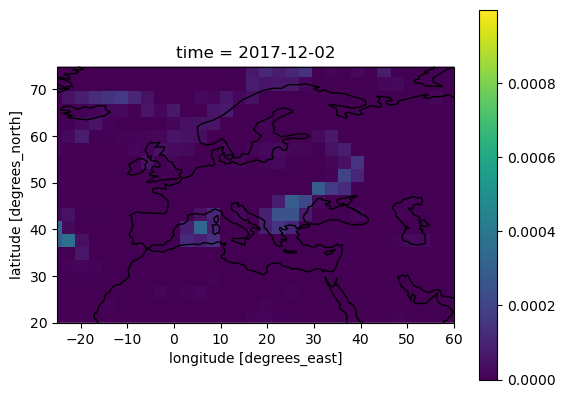

In [182]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# Rain rate [kg m^-2 s^-2]
rsfl = data_ECHAM['rsfl_2d'].isel(time = 0)
rsfc = data_ECHAM['rsfc_2d'].isel(time = 0)
rainr = rsfl + rsfc

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.xaxis.set_visible(True)  # Hidden by default
ax.yaxis.set_visible(True)
rainrplot = rainr.plot(transform=ccrs.PlateCarree())

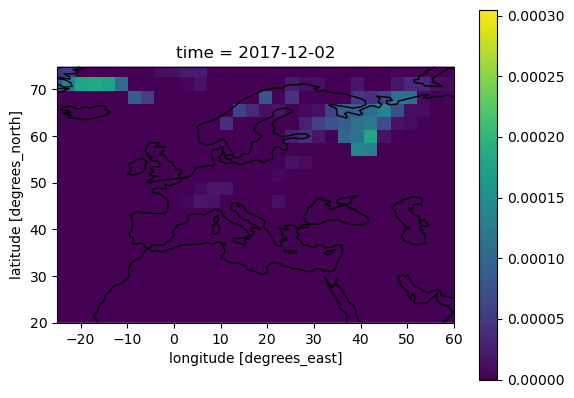

In [183]:
# Snow rate [kg m^-2 s^-2]
ssfl = data_ECHAM['ssfl_2d'].isel(time = 0)
ssfc = data_ECHAM['ssfc_2d'].isel(time = 0)
snowr = ssfl + ssfc

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.xaxis.set_visible(True)  # Hidden by default
ax.yaxis.set_visible(True)
snowrplot = snowr.plot(transform=ccrs.PlateCarree())

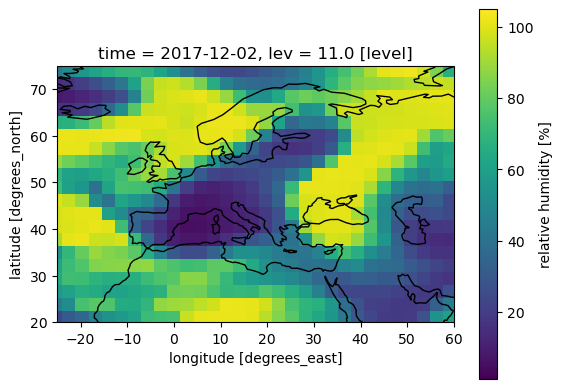

In [184]:
# Relative humidity
rel_hum = data_ECHAM['rhum'].isel(time = 0, lev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.xaxis.set_visible(True)  # Hidden by default
ax.yaxis.set_visible(True)
rel_humplot = rel_hum.plot(transform=ccrs.PlateCarree())

In [185]:
# Relative temperature
rel_temp = data_ECHAM['...'].isel(time = 0, lev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.xaxis.set_visible(True)  # Hidden by default
ax.yaxis.set_visible(True)
rel_tempplot = rel_temp.plot(transform=ccrs.PlateCarree())

KeyError: ''

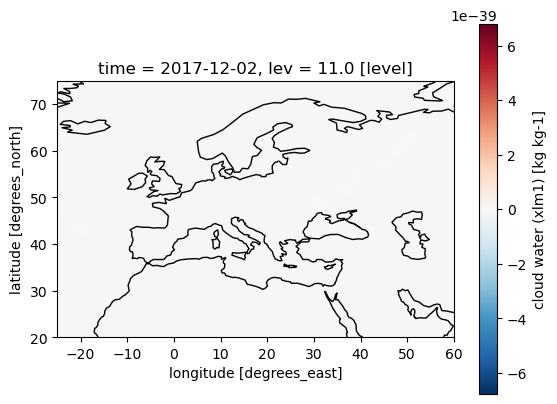

In [186]:
# Cloud water
cloud_water = data_ECHAM['xlm1'].isel(time = 0, lev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.xaxis.set_visible(True)  # Hidden by default
ax.yaxis.set_visible(True)
cloud_waterplot = cloud_water.plot(transform=ccrs.PlateCarree())

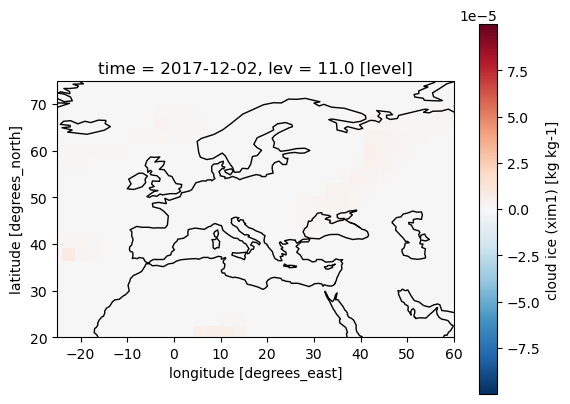

In [187]:
# Cloud ice
cloud_ice = data_ECHAM['xim1'].isel(time = 0, lev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.xaxis.set_visible(True)  # Hidden by default
ax.yaxis.set_visible(True)
cloud_iceplot = cloud_ice.plot(transform=ccrs.PlateCarree())

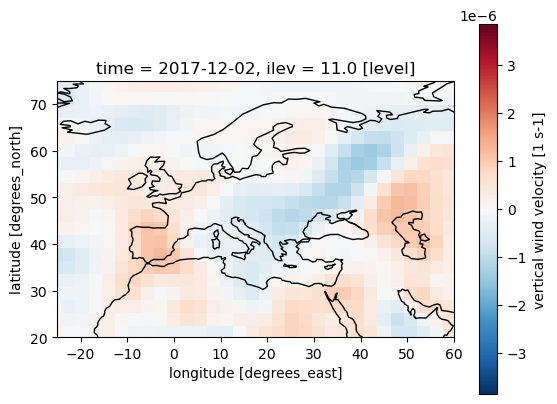

In [188]:
# Vertical wind in "etadot"
eta_wind = data_ECHAM['etadot'].isel(time = 0, ilev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.xaxis.set_visible(True)  # Hidden by default
ax.yaxis.set_visible(True)
eta_windplot = eta_wind.plot(transform=ccrs.PlateCarree())

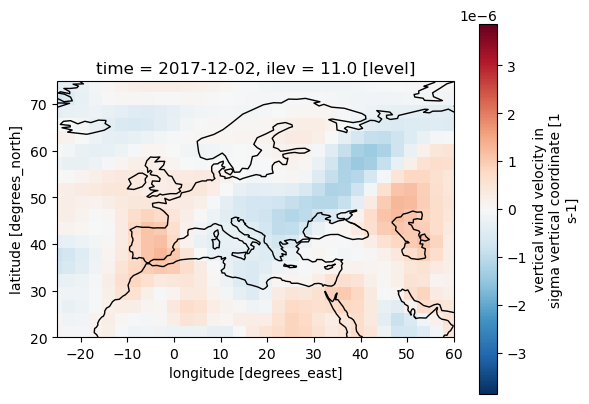

In [189]:
# Vertical wind in "sigmadot"
sigma_wind = data_ECHAM['sigmadot'].isel(time = 0, ilev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.xaxis.set_visible(True)  # Hidden by default
ax.yaxis.set_visible(True)
sigma_windplot = sigma_wind.plot(transform=ccrs.PlateCarree())

In [190]:
# u-winds
u_wind = data_ECHAM['um1'].isel(time = 0, lev = 10)
u_wind = x.concat([u_wind.sel(lon=slice(0., 60.)), u_wind.sel(lon=slice(335., 360.))], dim="lon")
u_wind = u_wind.sel(lat=slice(80., 20.))
#u_windplot = u_wind.plot()  # Shows a not-very-nice graph because only the values in latitude 20. -> 80. and in longitude -25. -> 60. are taken into account


In [191]:
# v-winds
v_wind = data_ECHAM['vm1'].isel(time = 0, lev = 10)
v_wind = x.concat([v_wind.sel(lon=slice(0., 60.)), v_wind.sel(lon=slice(335., 360.))], dim="lon")
v_wind = v_wind.sel(lat=slice(80., 20.))
#v_windplot = v_wind.plot()  # Shows a not-very-nice graph because only the values in latitude 20. -> 80. and in longitude -25. -> 60. are taken into account

The shape of the longitude, latitude, u_wind, and v_wind are resp.: (30,) (22,) (22, 30) (22, 30)


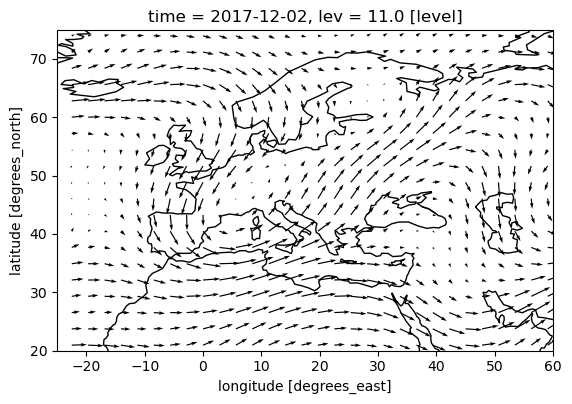

In [192]:
# u-winds & v-winds altogether [m s^-1]
import numpy as np

lon, lat = np.meshgrid(u_wind.lon, u_wind.lat)
print("The shape of the longitude, latitude, u_wind, and v_wind are resp.:", lon[0].shape, lat[:,0].shape, u_wind.shape, v_wind.shape)

ax = plt.axes(projection=ccrs.PlateCarree())
extent = [-25, 60, 20, 70]
ax.set_extent(extent)
ax.coastlines()
ax.quiver(lon, lat, u_wind, v_wind)
plt.title("time = 2017-12-02, lev = 11.0 [level]")
ax.set_xlabel("longitude [degrees_east]"); ax.xaxis.set_visible(True)  # Hidden by default
ax.set_ylabel("latitude [degrees_north]"); ax.yaxis.set_visible(True)
plt.show()